EDA

• Visualize at least two quantitative variables and two categorical variables. Your visualizations must be relevant to your research questions!

• Describe any trends you observe, and any relationships you may want to follow up on.

• Explain how your visualizations should be relevant to your research questions: either by moti-
vating the question, or suggesting a potential answer. You must explain why they are relevant.

In [1]:
# COPY THIS
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/data102')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install sodapy
from sodapy import Socrata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [4]:
cdi = pd.read_csv('data/cdi.csv')

<ipython-input-4-72ff7dc6ab96>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cdi = pd.read_csv('data/cdi.csv')


In [5]:
cdi.columns, cdi.shape

(Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
        'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
        'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
        'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
        'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
        'Stratification2', 'StratificationCategory3', 'Stratification3',
        'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
        'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
        'StratificationCategoryID2', 'StratificationID2',
        'StratificationCategoryID3', 'StratificationID3'],
       dtype='object'),
 (1185676, 34))

In [6]:
cdi["Topic"].unique()

array(['Asthma', 'Cancer', 'Chronic Kidney Disease',
       'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease',
       'Diabetes', 'Disability', 'Reproductive Health', 'Tobacco',
       'Alcohol', 'Arthritis',
       'Nutrition, Physical Activity, and Weight Status', 'Mental Health',
       'Older Adults', 'Oral Health', 'Overarching Conditions',
       'Immunization'], dtype=object)

In [93]:
diabetes = cdi[cdi['Topic'] == "Diabetes"]
obesity = cdi[cdi['Topic'] == "Nutrition, Physical Activity, and Weight Status"]

In [94]:
diabetes = diabetes[diabetes["Question"]== "Prevalence of diagnosed diabetes among adults aged >= 18 years"]
diabetes = diabetes[diabetes["DataValueType"]== "Age-adjusted Prevalence"]               
diabetes = diabetes[diabetes["StratificationCategory1"] == 'Overall']
diabetes = diabetes[['YearStart', 'LocationAbbr', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'StratificationCategory1', 'Stratification1']]
diabetes.head()

,YearStart,LocationAbbr,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1
532661,2017,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.6,7.6,Overall,Overall
533691,2021,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,8.0,8.0,Overall,Overall
534910,2015,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.8,7.8,Overall,Overall
535562,2013,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.3,7.3,Overall,Overall
535590,2011,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,8.5,8.5,Overall,Overall


In [98]:

diabetes.shape

(605, 11)

(605, 11)

In [96]:
obesity = obesity[obesity["Question"]=="Obesity among adults aged >= 18 years"]
obesity = obesity[obesity["DataValueType"]== "Age-adjusted Prevalence"]
obesity = obesity[obesity["StratificationCategory1"] == 'Overall']
obesity = obesity[['YearStart', 'LocationAbbr', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'StratificationCategory1', 'Stratification1']]
obesity.head()

,YearStart,LocationAbbr,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1
530338,2021,AL,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,40.6,40.6,Overall,Overall
531125,2014,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,29.8,29.8,Overall,Overall
531774,2018,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,29.4,29.4,Overall,Overall
532132,2016,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,32.2,32.2,Overall,Overall
532138,2020,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,31.8,31.8,Overall,Overall


In [97]:
obesity.shape

(605, 11)

In [101]:
dia_obe = diabetes.merge(obesity, on=["YearStart", "LocationAbbr"], how="inner")

In [103]:
dia_obe

,YearStart,LocationAbbr,Topic_x,Question_x,Response_x,DataValueUnit_x,DataValueType_x,DataValue_x,DataValueAlt_x,StratificationCategory1_x,Stratification1_x,Topic_y,Question_y,Response_y,DataValueUnit_y,DataValueType_y,DataValue_y,DataValueAlt_y,StratificationCategory1_y,Stratification1_y
0,2017,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.6,7.6,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,34.7,34.7,Overall,Overall
1,2021,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,8.0,8.0,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,33.4,33.4,Overall,Overall
2,2015,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.8,7.8,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,30.3,30.3,Overall,Overall
3,2013,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.3,7.3,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,28.7,28.7,Overall,Overall
4,2011,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,8.5,8.5,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,27.6,27.6,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2016,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.6,7.6,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,28.1,28.1,Overall,Overall
601,2021,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.6,7.6,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,32.2,32.2,Overall,Overall
602,2018,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.9,7.9,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,29.3,29.3,Overall,Overall
603,2014,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,NaN,%,Age-adjusted Prevalence,7.8,7.8,Overall,Overall,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,29.8,29.8,Overall,Overall


Text(0.5, 1.0, 'Correlation between Obesity Prevalence and Diabetes Prevalence')

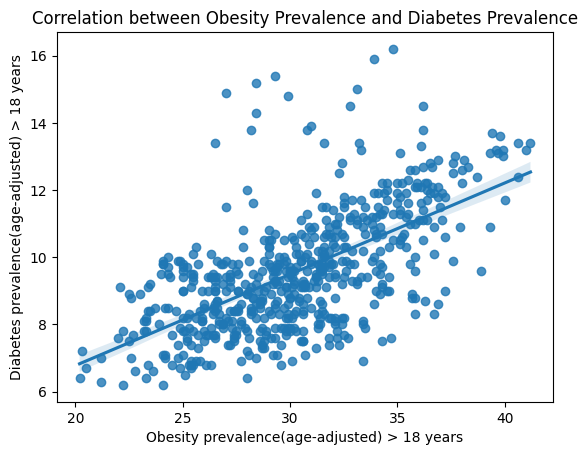

In [107]:
sns.regplot(data=dia_obe, y="DataValueAlt_x", x="DataValueAlt_y")
plt.xlabel("Obesity prevalence(age-adjusted) > 18 years")
plt.ylabel("Diabetes prevalence(age-adjusted) > 18 years")
plt.title("Correlation between Obesity Prevalence and Diabetes Prevalence")

In [7]:
copd = cdi[cdi['Topic'] == "Chronic Obstructive Pulmonary Disease"]
asthma = cdi[cdi['Topic'] == "Asthma"]
alcohol = cdi[cdi['Topic'] == "Alcohol"]

In [10]:
copd.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
QuestionID                    object
D

In [8]:
copd["YearStart"].value_counts()

2015    17103
2014    17103
2016    17046
2017    15354
2018    15354
2013    14016
2011    11910
2012    11910
2020    10170
2019    10170
2010     7518
2021     5220
Name: YearStart, dtype: int64

In [11]:
copd_2014 = copd[copd['YearStart'] == 2014]

In [12]:
copd_2014['Question'].unique()

array(['Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 45 years',
    

In [13]:
copd_2014_prevalence = copd_2014[copd_2014['Question'] == 'Prevalence of chronic obstructive pulmonary disease among adults >= 18']

In [16]:
copd_2014_prevalence.shape

(870, 34)

In [18]:
copd_2014_prevalence = copd_2014_prevalence[copd_2014_prevalence["DataValueType"] == 'Age-adjusted Prevalence']

In [19]:
copd_2014_prevalence.shape

(435, 34)

In [20]:
copd_2014_prevalence.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
530418,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
533823,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,2,COPD,COPD2_0,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN
534113,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,2,COPD,COPD2_0,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
535743,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,2,COPD,COPD2_0,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
536507,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,2,COPD,COPD2_0,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN


In [25]:
copd_2014_prevalence.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
QuestionID                    object
D

In [26]:
copd_2014_prevalence[['YearStart', 'LocationAbbr', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'StratificationCategory1', 'Stratification1']]

,YearStart,LocationAbbr,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1
530418,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,2.8,2.8,Gender,Male
533823,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
534113,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,NaN,NaN,Race/Ethnicity,Hispanic
535743,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,4.3,4.3,Overall,Overall
536507,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...
1174681,2014,WY,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
1175696,2014,WY,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,6.4,6.4,Gender,Male
1179083,2014,WY,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,6.4,6.4,Overall,Overall
1179604,2014,WY,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,NaN,NaN,Race/Ethnicity,"Other, non-Hispanic"


In [38]:
copd_2014_prevalence_overall = copd_2014_prevalence[copd_2014_prevalence["StratificationCategory1"] == 'Overall']
copd_2014_prevalence_overall = copd_2014_prevalence_overall[['YearStart', 'LocationAbbr', 'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'StratificationCategory1', 'Stratification1']]
copd_2014_prevalence_overall.head()

,YearStart,LocationAbbr,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1
535743,2014,AK,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,4.3,4.3,Overall,Overall
551572,2014,AL,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,9.7,9.7,Overall,Overall
557630,2014,AR,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,8.2,8.2,Overall,Overall
577688,2014,AZ,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.6,6.6,Overall,Overall
581238,2014,CA,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,4.7,4.7,Overall,Overall


In [39]:
copd_2014_prevalence_overall.dtypes

YearStart                    int64
LocationAbbr                object
Topic                       object
Question                    object
DataValueUnit               object
DataValueType               object
DataValue                   object
DataValueAlt               float64
StratificationCategory1     object
Stratification1             object
dtype: object

In [40]:
from scripts.state_agg import get_cdc_data, agg_county_weighted_mean

In [41]:
ozone = get_cdc_data("01JUL2014", ozone=True)

In [42]:
ozone_by_state = agg_county_weighted_mean(ozone)
ozone_by_state.head()

,state,ds_o3_pred,abbrev
0,Alabama,29.542927,AL
1,Arizona,43.801846,AZ
2,Arkansas,34.721968,AR
3,California,50.513304,CA
4,Colorado,53.015487,CO


In [43]:
ozone_by_state.shape

(49, 3)

In [44]:
copd_ozone = copd_2014_prevalence_overall.merge(ozone_by_state, right_on="abbrev", left_on="LocationAbbr", how='inner')

In [46]:
copd_ozone.head()

,YearStart,LocationAbbr,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,state,ds_o3_pred,abbrev
0,2014,AL,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,9.7,9.7,Overall,Overall,Alabama,29.542927,AL
1,2014,AR,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,8.2,8.2,Overall,Overall,Arkansas,34.721968,AR
2,2014,AZ,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.6,6.6,Overall,Overall,Arizona,43.801846,AZ
3,2014,CA,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,4.7,4.7,Overall,Overall,California,50.513304,CA
4,2014,CO,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,3.9,3.9,Overall,Overall,Colorado,53.015487,CO


In [50]:
import seaborn as sns

In [48]:
copd_ozone.dtypes

YearStart                    int64
LocationAbbr                object
Topic                       object
Question                    object
DataValueUnit               object
DataValueType               object
DataValue                   object
DataValueAlt               float64
StratificationCategory1     object
Stratification1             object
state                       object
ds_o3_pred                 float64
abbrev                      object
dtype: object

<Axes: xlabel='DataValueAlt', ylabel='ds_o3_pred'>

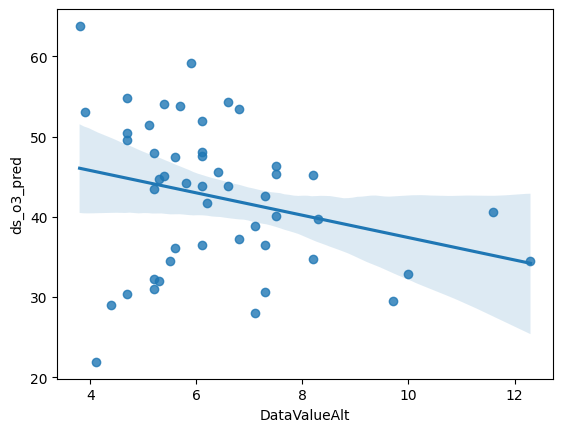

In [56]:
sns.regplot(data=copd_ozone,  y="ds_o3_pred", x="DataValueAlt")

In [57]:
pm25 = get_cdc_data("01JUL2014", ozone=False)
pm25_by_state = agg_county_weighted_mean(pm25)
pm25_by_state.head()

,state,ds_pm_pred,abbrev
0,Alabama,22.966910,AL
1,Arizona,4.887055,AZ
2,Arkansas,23.433149,AR
3,California,12.510747,CA
4,Colorado,11.874387,CO


In [59]:
copd_pm25 = copd_2014_prevalence_overall.merge(pm25_by_state, right_on="abbrev", left_on="LocationAbbr", how='inner')
copd_pm25.head()

,YearStart,LocationAbbr,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,state,ds_pm_pred,abbrev
0,2014,AL,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,9.7,9.7,Overall,Overall,Alabama,22.966910,AL
1,2014,AR,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,8.2,8.2,Overall,Overall,Arkansas,23.433149,AR
2,2014,AZ,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.6,6.6,Overall,Overall,Arizona,4.887055,AZ
3,2014,CA,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,4.7,4.7,Overall,Overall,California,12.510747,CA
4,2014,CO,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,3.9,3.9,Overall,Overall,Colorado,11.874387,CO


Text(0.5, 1.0, 'Correlation between COPD and Pm 2.5 concentrations in the year 2014 in each US state')

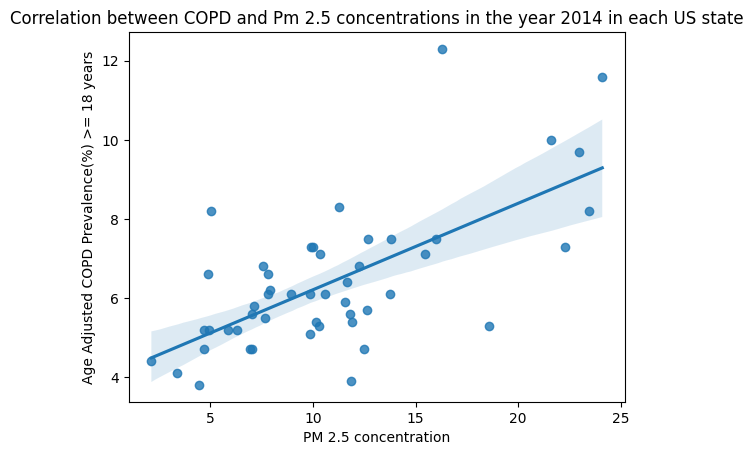

In [64]:
sns.regplot(data=copd_pm25,  x="ds_pm_pred", y="DataValueAlt")
plt.xlabel("PM 2.5 concentration")
plt.ylabel("Age Adjusted COPD Prevalence(%) >= 18 years")
plt.title("Correlation between COPD and Pm 2.5 concentrations in the year 2014 in each US state")

<Axes: xlabel='ds_o3_pred', ylabel='ds_pm_pred'>

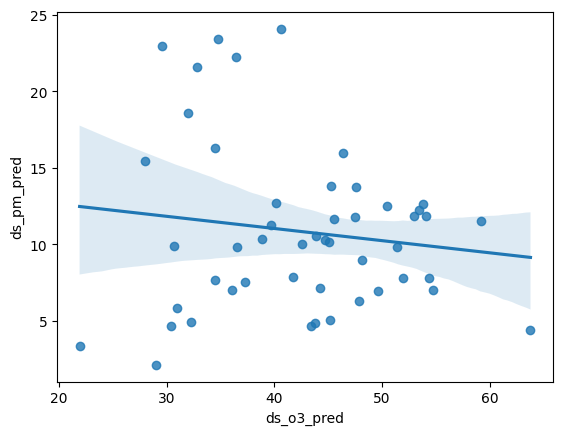

In [67]:
ozone_pm25 = ozone_by_state.merge(pm25_by_state, on="abbrev", how='inner')
sns.regplot(data=ozone_pm25,  y="ds_pm_pred", x="ds_o3_pred")

In [ ]:
alcohol.shape, asthma.shape

((66091, 34), (80342, 34))

In [ ]:
desired_cols = ['YearStart', 'YearEnd', 'LocationAbbr', 'Question', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1']
alcohol = alcohol[desired_cols]

In [ ]:
alcohol["Question"].value_counts()

Chronic liver disease mortality                                           13497
Heavy drinking among adults aged >= 18 years                               9570
Binge drinking intensity among adults aged >= 18 years who binge drink     9570
Binge drinking frequency among adults aged >= 18 years who binge drink     9570
Binge drinking prevalence among adults aged >= 18 years                    9570
Heavy drinking among women aged 18-44 years                                3575
Binge drinking prevalence among women aged 18-44 years                     3575
Alcohol use before pregnancy                                               2783
Alcohol use among youth                                                    1760
Binge drinking prevalence among youth                                       990
Per capita alcohol consumption among persons aged >= 14 years               330
Amount of alcohol excise tax by beverage type (beer)                        324
Amount of alcohol excise tax by beverage

In [ ]:
liver_disease = alcohol[alcohol['Question'] == "Chronic liver disease mortality"]
excise_tax_spirits = alcohol[alcohol['Question'].isin(['Amount of alcohol excise tax by beverage type (distilled spirits)'])]
excise_tax_wine = alcohol[alcohol['Question'].isin(['Amount of alcohol excise tax by beverage type (wine)'])]
excise_tax_beer = alcohol[alcohol['Question'].isin(['Amount of alcohol excise tax by beverage type (beer)'])]
dram_liability = alcohol[alcohol['Question'].isin(['Commercial host (dram shop) liability laws'])]


In [ ]:
alcohol[alcohol['Question'] == "Local authority to regulate alcohol outlet density"]["DataValue"].value_counts()

Category 3 - State had exclusive state alcohol retail licensing but with local zoning authority    48
Category 2 - State had joint local and state alcohol retail licensing                              30
Category 4 - State had mixed alcohol retail licensing policies                                     24
Category 1 - State had exclusive local alcohol retail licensing                                    24
Category 6 - State had exclusive state alcohol retail licensing                                    18
Category 5 - State had nearly exclusive state alcohol retail licensing                              6
Name: DataValue, dtype: int64

In [ ]:
dram_liability = dram_liability[["YearEnd", "LocationAbbr", "DataValue"]]

In [ ]:
dram_liability["DataValue"].value_counts(), dram_liability["YearEnd"].value_counts()

(Category 2 - State had commercial host liability with major limitations       72
 Category 1 - State had commercial host liability with no major limitations    63
 Category 3 - State had no commercial host liability                           18
 Name: DataValue, dtype: int64,
 2011    55
 2015    55
 2021    54
 Name: YearEnd, dtype: int64)

In [ ]:
dram_liability.shape

(164, 3)

In [ ]:
dram_liability=dram_liability.sort_values(by=["YearEnd", "LocationAbbr"])
dram_liability[dram_liability["DataValue"] == "Category 3 - State had no commercial host liability"]

,YearEnd,LocationAbbr,DataValue
28015,2011,DE,Category 3 - State had no commercial host liab...
16683,2011,KS,Category 3 - State had no commercial host liab...
27664,2011,MD,Category 3 - State had no commercial host liab...
30850,2011,NV,Category 3 - State had no commercial host liab...
29435,2011,SD,Category 3 - State had no commercial host liab...
16139,2011,VA,Category 3 - State had no commercial host liab...
27113,2015,DE,Category 3 - State had no commercial host liab...
21063,2015,KS,Category 3 - State had no commercial host liab...
18916,2015,MD,Category 3 - State had no commercial host liab...
26138,2015,NV,Category 3 - State had no commercial host liab...


In [ ]:
liver_disease["DataValueType"].value_counts()

Number               4499
Age-adjusted Rate    4499
Crude Rate           4499
Name: DataValueType, dtype: int64

In [ ]:
liver_disease = liver_disease[liver_disease["DataValueType"] == "Age-adjusted Rate"]
liver_disease["YearEnd"].value_counts()

2012    409
2013    409
2010    409
2017    409
2011    409
2020    409
2014    409
2016    409
2015    409
2018    409
2019    409
Name: YearEnd, dtype: int64

In [ ]:
liver_disease_2019 = liver_disease[liver_disease["YearEnd"] == 2019]
liver_disease_2010 = liver_disease[liver_disease["YearEnd"] == 2010]

In [ ]:
excise_tax_wine["YearEnd"].value_counts()

2015    54
2017    54
2019    54
2012    54
2020    54
2021    54
Name: YearEnd, dtype: int64

In [ ]:
liver_disease.head()

,YearStart,YearEnd,LocationAbbr,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
195,2012,2012,NM,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,NaN,NaN,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander
202,2013,2013,MA,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,6.9,6.9,NaN,4.5,10.2,Race/Ethnicity,Hispanic
205,2012,2012,CT,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,7.9,7.9,NaN,6.9,8.8,Race/Ethnicity,"White, non-Hispanic"
207,2010,2010,OH,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,12.9,12.9,NaN,12.0,13.8,Gender,Male
209,2013,2013,MN,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,43.3,43.3,NaN,27.7,64.4,Race/Ethnicity,American Indian or Alaska Native


In [ ]:
liver_disease_pivot = liver_disease.pivot_table(columns='YearEnd', index='LocationAbbr', values='DataValueAlt')
liver_disease_pivot["change"] = liver_disease_pivot[2020] - liver_disease_pivot[2010]
liver_disease_pivot = liver_disease_pivot.sort_values(by=["change"], ascending=False)
liver_disease_pivot.head()

YearEnd,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,change
LocationAbbr,,,,,,,,,,,,
US,10640.900000,11220.833333,11666.666667,12149.566667,12730.800000,13449.766667,13522.733333,13922.233333,14287.400000,14794.266667,17223.666667,6582.766667
TX,416.557143,447.804762,477.409524,493.947619,532.304762,555.900000,561.147619,593.376190,600.457143,630.157143,712.780952,296.223810
CA,544.275000,579.754167,594.295833,611.604167,635.004167,687.637500,669.191667,675.295833,683.337500,706.625000,782.716667,238.441667
FL,418.466667,375.890476,436.233333,449.100000,512.233333,519.077778,468.004762,448.580952,484.690476,462.785714,542.728571,124.261905
GA,152.246667,132.133333,177.926667,183.346667,160.383333,171.722222,173.333333,196.477778,200.711111,181.785714,251.644444,99.397778


In [ ]:
liver_disease_pivot.shape

(52, 12)

In [ ]:
excise_pivot = excise_tax_beer.pivot_table(columns='YearEnd', index='LocationAbbr', values='DataValueAlt')
excise_pivot["change"] = excise_pivot[2021] - excise_pivot[2012]
excise_pivot = excise_pivot.sort_values(by=[2021], ascending=False)

In [ ]:
excise_pivot.shape

(50, 7)

In [ ]:
excise_pivot

YearEnd,2012,2015,2017,2019,2020,2021,change
LocationAbbr,,,,,,,
TN,0.14,1.29,1.29,1.29,1.29,1.29,1.15
AK,1.07,1.07,1.07,1.07,1.07,1.07,0.00
AL,1.05,1.05,1.05,1.05,1.05,1.05,0.00
GA,1.01,1.01,1.01,1.01,1.01,1.01,0.00
HI,0.93,0.93,0.93,0.93,0.93,0.93,0.00
SC,0.77,0.77,0.77,0.77,0.77,0.77,0.00
WA,0.76,0.76,0.76,0.76,0.76,0.76,0.00
NC,0.62,0.62,0.62,0.62,0.62,0.62,0.00
FL,0.48,0.48,0.48,0.48,0.48,0.48,0.00


In [ ]:
import seaborn as sns

#### Geographical trends

In [ ]:
cold = ["ND", "WI", "IL", "AK", "MN", "MI", "VT", "MA", "WY"]
hot = ["AL", "TN", "MS", 'NM', 'OK', 'NC', "MD", "AZ", "TX"]

<Axes: xlabel='YearStart', ylabel='DataValueAlt'>

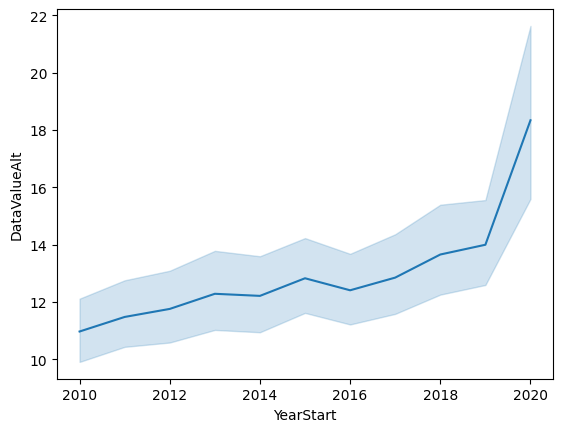

In [ ]:
cold_liver = liver_disease[liver_disease["LocationAbbr"].isin(cold)]
hot_liver = liver_disease[liver_disease["LocationAbbr"].isin(hot)]

<Axes: xlabel='YearStart', ylabel='DataValueAlt'>

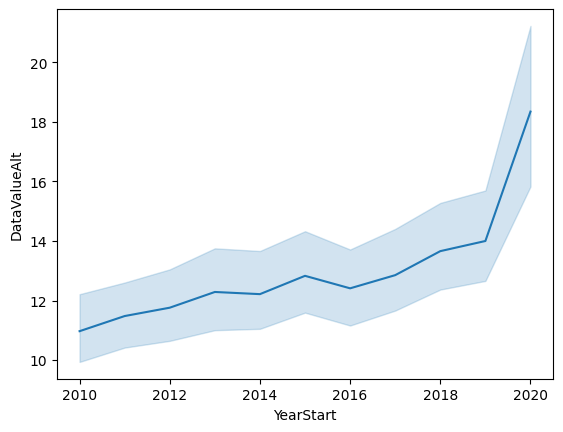

In [ ]:
sns.lineplot(data=liver_disease, x='YearStart', y='DataValueAlt')

<Axes: xlabel='YearStart', ylabel='DataValueAlt'>

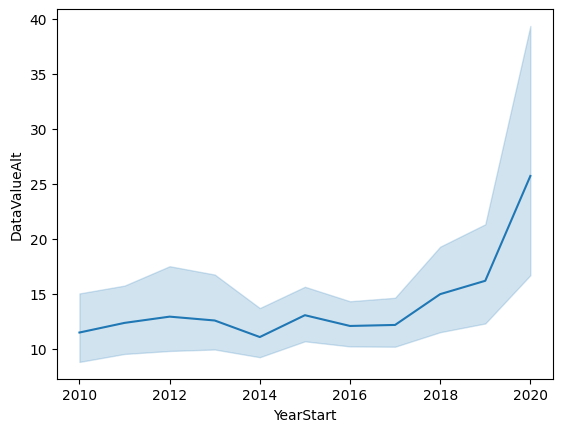

In [ ]:
sns.lineplot(data=cold_liver, x='YearStart', y='DataValueAlt')

<Axes: xlabel='YearStart', ylabel='DataValueAlt'>

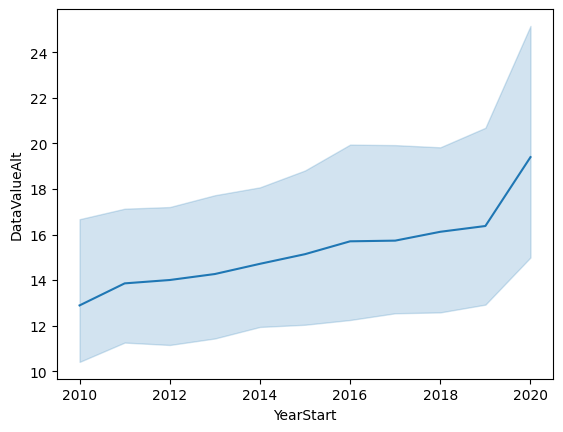

In [ ]:
sns.lineplot(data=hot_liver, x='YearStart', y='DataValueAlt')

In [ ]:
import plotly.express as px

In [ ]:
#liver_disease_by_state = liver_disease.groupby("LocationAbbr").NamedAgg(age_adjusted_rate = DataValueAlt.median()

In [ ]:
fig = px.choropleth(liver_disease_pivot, locations=liver_disease_pivot.index, locationmode="USA-states", color='change',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'DataValueAlt':'CHANGE in rate'}
                          )
fig.show()

to do :
- compare geographical trends in chronic diseases -- could this correlate with pm2.5 and ozone concentrations?? - esp for asthma
- how does income/SES affect chronic illnesses -- esp alcohol 
- multiple hypothesis testing of risk factors of chronic illnesses -- based on 'questions' column

In [ ]:
fig2 = px.choropleth(excise_tax_spirits, locations=excise_tax_spirits['LocationAbbr'], locationmode="USA-states", color='DataValueAlt',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'DataValueAlt':'Excise tax $'}
                          )
fig2.show()